In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Fitness_Tracker_Data.csv')

In [3]:
df.head()

,User_ID,Date,Steps,Heart_Rate_avg,Calories_Burned,Workout_Type
0,4001,2024-01-01,14748,68,598,Cardio
1,4002,2024-01-02,8943,74,428,Cardio
2,4003,2024-01-03,14195,69,724,NaN
3,4004,2024-01-04,7963,97,284,Strength
4,4005,2024-01-05,14671,93,622,Yoga


In [4]:
df.shape

(100, 6)

In [5]:
df.isnull().sum()

User_ID             0
Date                0
Steps               0
Heart_Rate_avg      0
Calories_Burned     0
Workout_Type       21
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User_ID          100 non-null    int64 
 1   Date             100 non-null    object
 2   Steps            100 non-null    int64 
 3   Heart_Rate_avg   100 non-null    int64 
 4   Calories_Burned  100 non-null    int64 
 5   Workout_Type     79 non-null     object
dtypes: int64(4), object(2)
memory usage: 4.8+ KB


In [8]:
df.describe()

,User_ID,Steps,Heart_Rate_avg,Calories_Burned
count,100.000000,100.00000,100.000000,100.000000
mean,4050.500000,8455.22000,79.690000,473.640000
std,29.011492,4157.31053,10.370602,181.639588
min,4001.000000,1000.00000,61.000000,160.000000
25%,4025.750000,4855.00000,70.000000,304.500000
50%,4050.500000,8681.50000,80.000000,488.500000
75%,4075.250000,11662.00000,89.000000,623.250000
max,4100.000000,14972.00000,99.000000,795.000000


In [9]:
df['Workout_Type'].value_counts()


Workout_Type
Yoga        27
Cardio      26
Strength    26
Name: count, dtype: int64

### Fill Missing Values us Random Imputation Technique

In [10]:
null_mask = df['Workout_Type'].isnull()  
n_missing = null_mask.sum()  

# Randomly sample from existing categories (weighted by their counts)  
random_imputation = np.random.choice(
    ['Yoga', 'Cardio','Strength'], 
    size=n_missing, 
    p=[27/79, 26/79,26/79]  # Probabilities based on observed frequencies
)  
# Fill missing values  
df.loc[null_mask, 'Workout_Type'] = random_imputation  

# Verify counts  
print(df['Workout_Type'].value_counts())  

Workout_Type
Yoga        36
Strength    34
Cardio      30
Name: count, dtype: int64


In [11]:
df.isnull().sum()

User_ID            0
Date               0
Steps              0
Heart_Rate_avg     0
Calories_Burned    0
Workout_Type       0
dtype: int64

In [12]:
df.sample(5)

,User_ID,Date,Steps,Heart_Rate_avg,Calories_Burned,Workout_Type
34,4035,2024-02-04,14169,68,585,Cardio
19,4020,2024-01-20,7944,91,788,Yoga
18,4019,2024-01-19,3821,96,349,Yoga
92,4093,2024-04-02,8179,61,213,Cardio
91,4092,2024-04-01,14410,90,654,Strength


In [13]:
# Drop irrelevant cloumns
df.drop(columns=['User_ID','Date'], axis=1, inplace=True)
df

,Steps,Heart_Rate_avg,Calories_Burned,Workout_Type
0,14748,68,598,Cardio
1,8943,74,428,Cardio
2,14195,69,724,Strength
3,7963,97,284,Strength
4,14671,93,622,Yoga
...,...,...,...,...
95,7333,76,299,Yoga
96,11548,63,393,Yoga
97,12708,85,443,Cardio
98,6781,73,711,Yoga


## Exploratory Data Analysis

#### Correlation Heatmap
#### Shows how strongly each numeric feature is correlated with Calories_Burned.

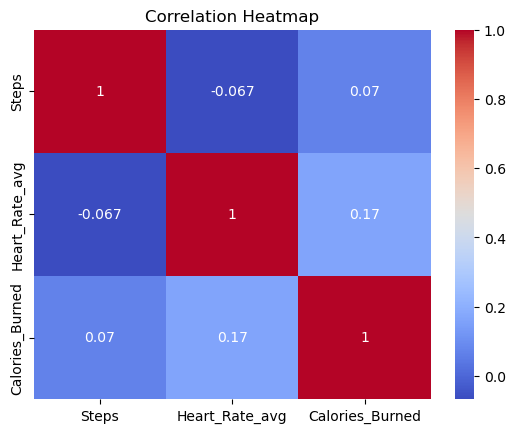

In [14]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Box Plot of Target by Categorical Feature (Workout_Type)
### Understand how Calories_Burned differs across workout types.

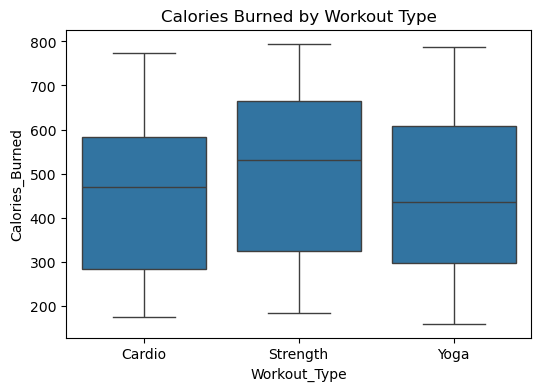

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Workout_Type', y='Calories_Burned', data=df)
plt.title('Calories Burned by Workout Type')
plt.show()

### Pairplot (for numeric features)
### Shows pairwise relationships between features and target

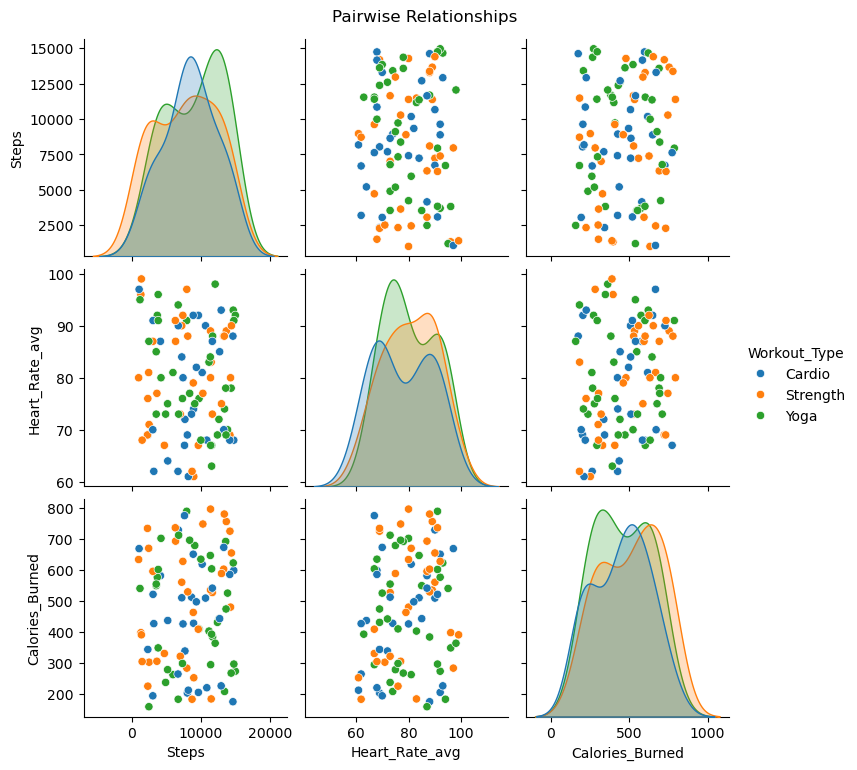

In [16]:
sns.pairplot(df, vars=['Steps', 'Heart_Rate_avg', 'Calories_Burned'], hue='Workout_Type')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

In [17]:
num_features = ['Steps', 'Heart_Rate_avg']
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])
df

,Steps,Heart_Rate_avg,Calories_Burned,Workout_Type
0,1.521292,-1.132904,598,Cardio
1,0.117922,-0.551430,428,Cardio
2,1.387603,-1.035991,724,Strength
3,-0.118995,1.677550,284,Strength
4,1.502677,1.289901,622,Yoga
...,...,...,...,...
95,-0.271299,-0.357606,299,Yoga
96,0.747686,-1.617464,393,Yoga
97,1.028118,0.514604,443,Cardio
98,-0.404746,-0.648343,711,Yoga


In [18]:
# Using get_dummies with dtype=int
#df = pd.get_dummies(df, columns=['Workout_Type'], dtype=int,drop_first=True)

In [19]:
# Create encoder with drop='first' to avoid dummy variable trap
encoder = OneHotEncoder(drop='first', sparse_output=False, dtype=int)
# Fit and transform
encoded_array = encoder.fit_transform(df[['Workout_Type']])
# Get feature names
encoded_cols = encoder.get_feature_names_out(['Workout_Type'])
# Create encoded DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols)
# Combine with original dataframe (drop the original categorical column)
df_encoded = pd.concat([df.drop(columns=['Workout_Type']), encoded_df], axis=1)
df_encoded

,Steps,Heart_Rate_avg,Calories_Burned,Workout_Type_Strength,Workout_Type_Yoga
0,1.521292,-1.132904,598,0,0
1,0.117922,-0.551430,428,0,0
2,1.387603,-1.035991,724,1,0
3,-0.118995,1.677550,284,1,0
4,1.502677,1.289901,622,0,1
...,...,...,...,...,...
95,-0.271299,-0.357606,299,0,1
96,0.747686,-1.617464,393,0,1
97,1.028118,0.514604,443,0,0
98,-0.404746,-0.648343,711,0,1


## Prediction

In [20]:
# setup feature columnas and target columns
X = df_encoded.drop(columns=['Calories_Burned'])
y= df_encoded['Calories_Burned']

In [21]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training, 20% testing

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)


In [24]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")  
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 142.6978473265093
Mean Squared Error: 28514.503606184262
R-squared: -0.1461937427217248


In [25]:
#Predict the target value for a new input
new_input = np.array([[-0.271299,-0.357606,0,1]])  # Input feature
predicted_value = model.predict(new_input)
print(f"Predicted value for new input: {predicted_value}")

Predicted value for new input: [424.36512203]


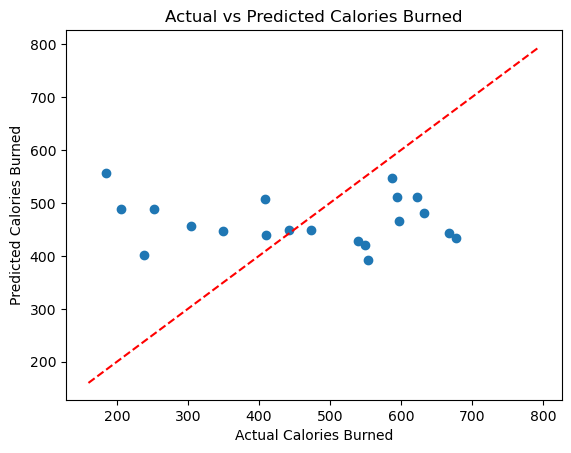

In [26]:
# Plot actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.title('Actual vs Predicted Calories Burned')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line of perfect prediction
plt.show()